# وَأَن لَّيْسَ لِلْإِنسَانِ إِلَّا مَا سَعَىٰ (39) وَأَنَّ سَعْيَهُ سَوْفَ يُرَىٰ (40) ثُمَّ يُجْزَاهُ الْجَزَاءَ الْأَوْفَىٰ 


In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [71]:
file=pd.read_csv(r"C:\Users\User.DESKTOP-OQ6NE4T\Desktop\Heart Failure Prediction\Heart Failure Prediction.csv")

In [72]:
file

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [73]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# # Show relationship before do anyhthing

In [74]:
'''sns.pairplot(file)
plt.show()'''

'sns.pairplot(file)\nplt.show()'

In [75]:
file['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [76]:
file['New ChestPainType']=file['ChestPainType'].map(file['ChestPainType'].value_counts())
file.drop(labels='ChestPainType',axis=1,inplace=True)

In [77]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(file[['New ChestPainType']])


encoded_columns = encoder.get_feature_names_out(['New ChestPainType'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)


file = pd.concat([file, encoded_df], axis=1)


file.drop(columns=['New ChestPainType'], inplace=True)



In [78]:
file['Sex']=file['Sex'].map({'M':0,'F':1})

In [79]:
file['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [80]:
encoded_data = encoder.fit_transform(file[['RestingECG']])


encoded_columns = encoder.get_feature_names_out(['RestingECG'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)


file = pd.concat([file, encoded_df], axis=1)


file.drop(columns=['RestingECG'], inplace=True)

In [81]:
file['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [82]:
file['ExerciseAngina']=file['ExerciseAngina'].map({'N':0,'Y':1})

In [83]:
file['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [84]:
encoded_data = encoder.fit_transform(file[['ST_Slope']])


encoded_columns = encoder.get_feature_names_out(['ST_Slope'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)


file = pd.concat([file, encoded_df], axis=1)


file.drop(columns=['ST_Slope'], inplace=True)

In [85]:
#Attribute Information
#Age: age of the patient [years]
#Sex: sex of the patient [M: Male, F: Female]
#ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
#RestingBP: resting blood pressure [mm Hg]
#Cholesterol: serum cholesterol [mm/dl]
#FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
#RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable #or definite left ventricular hypertrophy by Estes' criteria]
#MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
#ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
#Oldpeak: oldpeak = ST [Numeric value measured in depression]
#ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
#HeartDisease: output class [1: heart disease, 0: Normal]

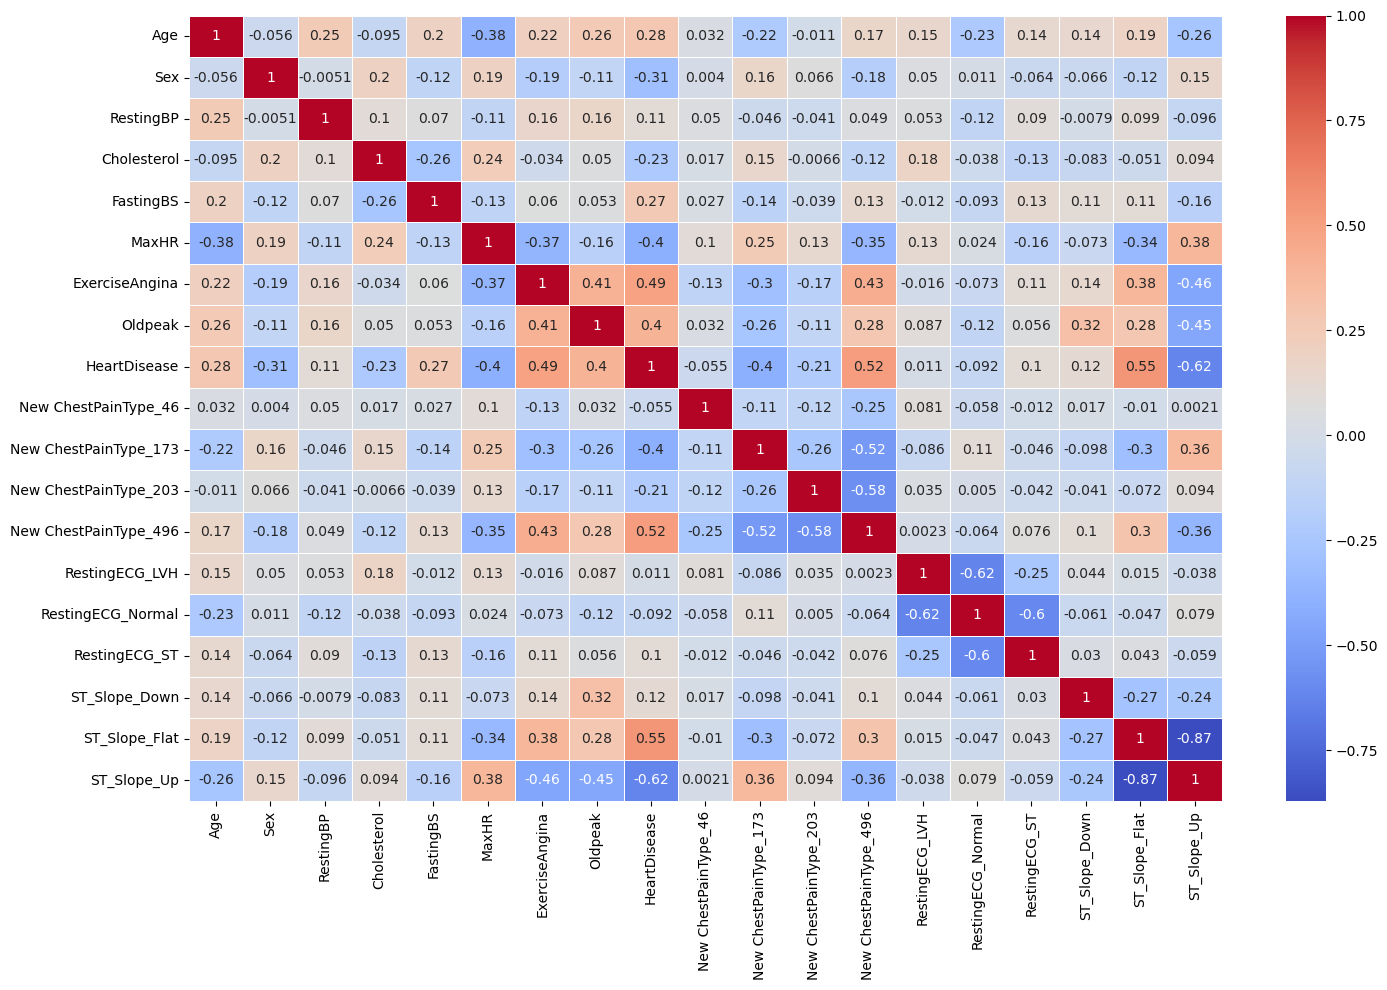

In [86]:
fig, axes = plt.subplots(1,1, figsize=(15, 10)) 
sns.heatmap(file.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.tight_layout()
plt.show()

# Define Labels And Features

In [87]:
label=file['HeartDisease']
features=file.drop(labels=['HeartDisease','Age','Sex','Cholesterol','MaxHR','New ChestPainType_46','New ChestPainType_173','New ChestPainType_203','RestingECG_LVH','RestingECG_Normal'],axis=1)

# Scale Values Of ['Age' , 'RestingBP' , 'Cholesterol' , 'MaxHR' , 'Oldpeak'] 

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
file[['Age' , 'RestingBP' , 'Cholesterol' , 'MaxHR' , 'Oldpeak']]=scaler.fit_transform(file[['Age' , 'RestingBP' , 'Cholesterol' , 'MaxHR' , 'Oldpeak']])

In [89]:
file

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,New ChestPainType_46,New ChestPainType_173,New ChestPainType_203,New ChestPainType_496,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0,0.70,0.479270,0,0.788732,0,0.295455,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,1,0.80,0.298507,0,0.676056,0,0.409091,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0,0.65,0.469320,0,0.267606,0,0.295455,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.408163,1,0.69,0.354892,0,0.338028,1,0.465909,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.530612,0,0.75,0.323383,0,0.436620,0,0.295455,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0,0.55,0.437811,0,0.507042,0,0.431818,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
914,0.816327,0,0.72,0.320066,1,0.570423,0,0.681818,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.591837,0,0.65,0.217247,0,0.387324,1,0.431818,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
916,0.591837,1,0.65,0.391376,0,0.802817,0,0.295455,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Split Data To Train And Test

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=.6,random_state=80)

 # Apply Logistic Regression With Some Cases 

In [91]:
from sklearn.linear_model import LogisticRegression
model_1_LR=LogisticRegression(max_iter=1000,C=0.3,penalty='l1',solver='liblinear')
model_1_LR.fit(x_train,y_train)

LogisticRegression(C=0.3, max_iter=1000, penalty='l1', solver='liblinear')

In [92]:
model_1_LR_predictions=model_1_LR.predict(x_test)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       251
           1       0.83      0.89      0.86       300

    accuracy                           0.84       551
   macro avg       0.84      0.84      0.84       551
weighted avg       0.84      0.84      0.84       551

Accuracy =  0.8421052631578947


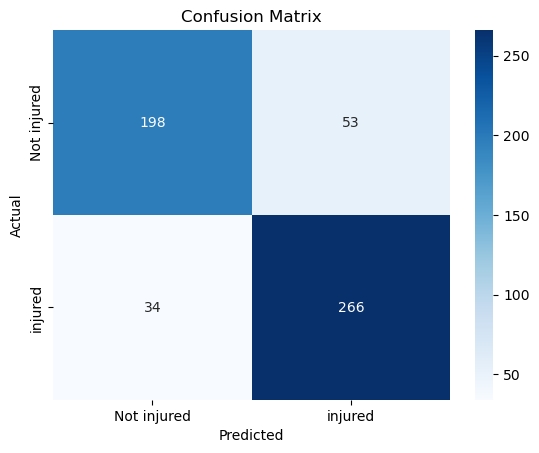

In [93]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(classification_report(y_test,model_1_LR_predictions))

accuracy=accuracy_score(y_test,model_1_LR_predictions)
print("Accuracy = ",accuracy)

confusion_matrix=confusion_matrix(y_test,model_1_LR_predictions)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not injured', 'injured'], yticklabels=['Not injured', 'injured'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Apply SVM With Some Cases

# 1- Kernal = linear

In [94]:
from sklearn import svm

model_1_SVM=svm.SVC(C=0.5,kernel='linear')

model_1_SVM.fit(x_train,y_train)

model_1_SVM_predictions=model_1_SVM.predict(x_test)

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       251
           1       0.81      0.86      0.83       300

    accuracy                           0.81       551
   macro avg       0.82      0.81      0.81       551
weighted avg       0.81      0.81      0.81       551

Accuracy =  0.8148820326678766


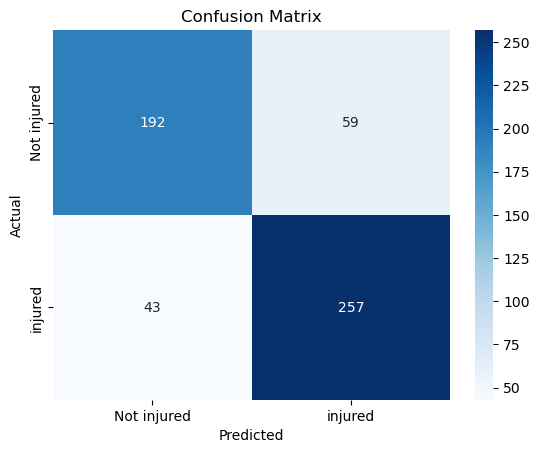

In [95]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


print(classification_report(y_test,model_1_SVM_predictions))

accuracy=accuracy_score(y_test,model_1_SVM_predictions)
print("Accuracy = ",accuracy)

confusion_matrix=confusion_matrix(y_test,model_1_SVM_predictions)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not injured', 'injured'], yticklabels=['Not injured', 'injured'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# By Using This Code Find The Best Parameters 

In [96]:
from sklearn import svm

model_2_SVM=svm.SVC(kernel='poly',gamma='auto',degree=3,cache_size=1000,shrinking=True)

model_2_SVM.fit(x_train,y_train)

model_2_SVM_predictions=model_2_SVM.predict(x_test)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       251
           1       0.81      0.93      0.87       300

    accuracy                           0.84       551
   macro avg       0.85      0.84      0.84       551
weighted avg       0.85      0.84      0.84       551

Accuracy =  0.8439201451905626


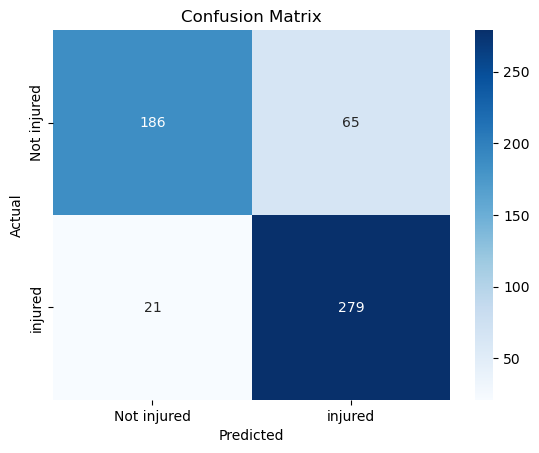

In [97]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


print(classification_report(y_test,model_2_SVM_predictions))

accuracy=accuracy_score(y_test,model_2_SVM_predictions)
print("Accuracy = ",accuracy)

confusion_matrix=confusion_matrix(y_test,model_2_SVM_predictions)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not injured', 'injured'], yticklabels=['Not injured', 'injured'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [102]:
from sklearn import svm

model_3_SVM=svm.SVC(kernel='rbf',gamma=0.8,degree=6,cache_size=1000,shrinking=True)

model_3_SVM.fit(x_train,y_train)

model_3_SVM_predictions=model_3_SVM.predict(x_test)

              precision    recall  f1-score   support

           0       0.91      0.66      0.76       251
           1       0.77      0.95      0.85       300

    accuracy                           0.81       551
   macro avg       0.84      0.80      0.81       551
weighted avg       0.83      0.81      0.81       551

Accuracy =  0.8148820326678766


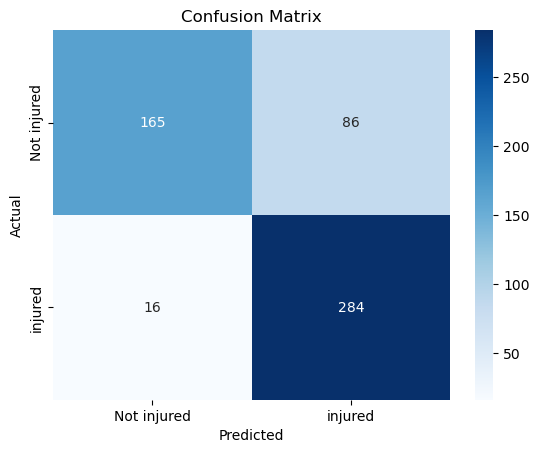

In [103]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


print(classification_report(y_test,model_3_SVM_predictions))

accuracy=accuracy_score(y_test,model_3_SVM_predictions)
print("Accuracy = ",accuracy)

confusion_matrix=confusion_matrix(y_test,model_3_SVM_predictions)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not injured', 'injured'], yticklabels=['Not injured', 'injured'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Apply Decision Tree With Some Cases

In [106]:
from sklearn.tree import DecisionTreeClassifier

model_1_DT=DecisionTreeClassifier(criterion='entropy',max_depth=4,splitter='best')

model_1_DT.fit(x_train,y_train)

model_1_DT_predictions=model_1_DT.predict(x_test)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       251
           1       0.86      0.84      0.85       300

    accuracy                           0.83       551
   macro avg       0.83      0.83      0.83       551
weighted avg       0.84      0.83      0.84       551

Accuracy =  0.8348457350272233


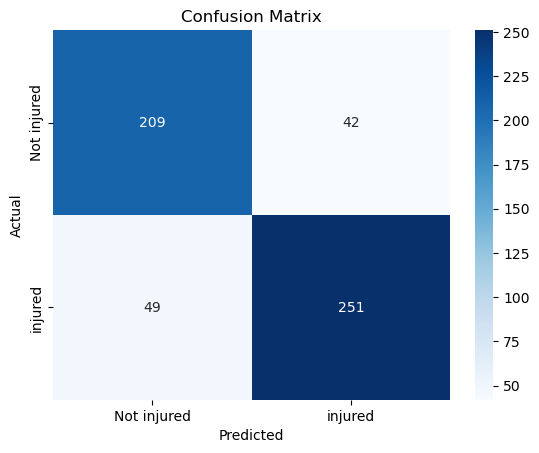

In [107]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


print(classification_report(y_test,model_1_DT_predictions))

accuracy=accuracy_score(y_test,model_1_DT_predictions)
print("Accuracy = ",accuracy)

confusion_matrix=confusion_matrix(y_test,model_1_DT_predictions)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not injured', 'injured'], yticklabels=['Not injured', 'injured'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [114]:
model_2_DT=DecisionTreeClassifier(criterion='entropy',max_depth=6,splitter='best')

model_2_DT.fit(x_train,y_train)

model_2_DT_predictions=model_2_DT.predict(x_test)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       251
           1       0.84      0.86      0.85       300

    accuracy                           0.84       551
   macro avg       0.84      0.83      0.84       551
weighted avg       0.84      0.84      0.84       551

Accuracy =  0.8366606170598911


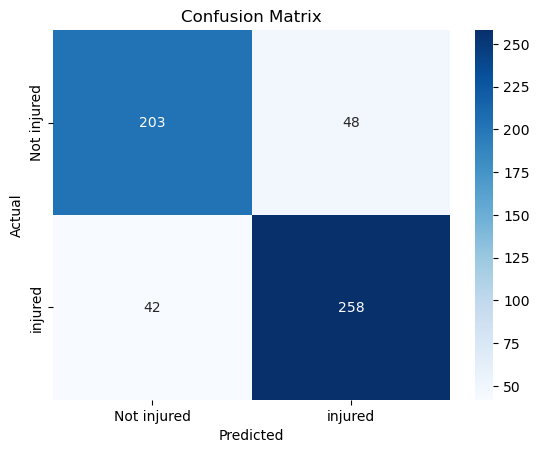

In [115]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


print(classification_report(y_test,model_2_DT_predictions))

accuracy=accuracy_score(y_test,model_2_DT_predictions)
print("Accuracy = ",accuracy)

confusion_matrix=confusion_matrix(y_test,model_2_DT_predictions)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not injured', 'injured'], yticklabels=['Not injured', 'injured'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()